In [1]:
# importing modules and librairies

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap
import calendar
from dbfread import DBF

In [2]:
# opening data
path = r'OPENDATA_OFFRES_TOURISTIQUES_SHAPE_1612351955036/OFFRES_TOURISTIQUES.dbf' # File Directory
table = DBF(path, encoding=None)
df = pd.DataFrame(iter(table))


In [3]:
df

,OBJECTID,ID_OFFRE,TYPE_OFFRE,CODE,NOM,RUE,NUMERO,CODE_POSTA,COMMUNE,PHONE1,MAIL,SITE_WEB,FACEBOOK,X,Y,LON,LAT,ORGANISME,DATE_MODIF
0,11164,261.0,Restauration,RST-07-000CY3,Attrape Loup,Rue de Rocroi,102,6464,Chimay,+3260211147,info@attrapeloup.be,http://www.attrapeloup.be,https://www.facebook.com/LattrapeLoup/,150264.0,78286.0,4.37243,50.01588,Pays des Lacs,20190710000000
1,11308,261.0,Restauration,RST-07-00OM-00MU,"Traiteur ""Gourman'Dim""",Trieu Bouton,53,6464,Chimay,+3260211322,info@goumandim.com,http://www.linterrogation.be/,https://www.facebook.com/interrogationfleron,150655.0,78701.0,4.37788,50.01961,Pays des Lacs,20190515000000
2,11224,261.0,Restauration,RST-07-000CZ0,Auberge de Poteaupré,Rue de Poteaupré,5,6464,Chimay,+3260211433,poteaupre@chimaygestion.be,http://www.chimay.com,https://www.facebook.com/Auberge-de-Poteaupr%C...,148011.0,79323.0,4.34098,50.02520,Pays des Lacs,20201105000000
3,1982,2.0,Gîte,GIT-01-04B9-0005,Gîte de la Bruyère II,Rue Bruyere,45,6464,Chimay,+3260214617,gitelabruyere@skynet.be,http://www.gitelabruyere.net,https://www.facebook.com/interrogationfleron,152144.0,79384.0,4.39866,50.02575,Pays des Lacs,20201013000000
4,11227,261.0,Restauration,RST-07-000CZ1,La Ferme des 4 Saisons,Rue de Scourmont,8,6464,Chimay,+3260214246,admin@f4saisons.be,http://www.ferme4saisons.be,https://www.facebook.com/La-Ferme-des-4-Saison...,148012.0,79545.0,4.34100,50.02720,Pays des Lacs,20200907000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2224,3.0,Chambre d’hôtes,CGT_0003_000003D1,Le Petit Chapitre - Chambre Antoinette,Place du Chapitre,5,6460,Chimay,+3260211042,brim@skynet.be,http://www.lepetitchapitre.be,https://www.facebook.com/interrogationfleron,146255.0,82041.0,4.31645,50.04963,Pays des Lacs,20201020000000
76,2246,3.0,Chambre d’hôtes,CHB-01-04BH-00HX,Le Petit Chapitre- Chambre Coton,Place du Chapitre,5,6460,Chimay,+3260211042,brim@skynet.be,http://www.lepetitchapitre.be,https://www.facebook.com/interrogationfleron,146255.0,82041.0,4.31645,50.04963,Pays des Lacs,20190821000000
77,2242,3.0,Chambre d’hôtes,CHB-01-04BH-009X,Le Petit Chapitre - Chambre Bleue,Place du Chapitre,5,6460,Chimay,+3260211042,brim@skynet.be,http://www.lepetitchapitre.be,https://www.facebook.com/interrogationfleron,146255.0,82041.0,4.31645,50.04963,Pays des Lacs,20201020000000
78,4900,11.0,Découverte et Divertissement,ALD-07-00PE-00BK,Collégiale Saints Pierre et Paul,Rue de Noailles,6,6460,Chimay,+3260211846,info@si-chimay.be,http://www.si-chimay.be/index.php/visiter/159-...,https://www.facebook.com/visitchimay,146316.0,81989.0,4.31731,50.04916,Pays des Lacs,20201103000000


In [4]:
df.isna().sum()

OBJECTID      0
ID_OFFRE      0
TYPE_OFFRE    0
CODE          0
NOM           0
RUE           0
NUMERO        0
CODE_POSTA    0
COMMUNE       0
PHONE1        0
MAIL          0
SITE_WEB      0
FACEBOOK      0
X             0
Y             0
LON           0
LAT           0
ORGANISME     0
DATE_MODIF    0
dtype: int64

In [5]:
df.shape

(80, 19)

In [6]:
df['TYPE_OFFRE'].value_counts()

Restauration                    29
Découverte et Divertissement    16
Gîte                            14
Chambre d’hôtes                 12
Point d’intérêt                  4
Camping                          3
Hôtel                            1
Organisme touristique            1
Name: TYPE_OFFRE, dtype: int64

In [7]:
# save to csv file
df.to_csv(r'cleaned_data/wallonia.csv', index=False)

In [8]:
heat_df = df[['LAT', 'LON']]
heat_df = df.dropna(axis=0, subset=['LAT','LON'])
heat_data = [[row['LAT'],row['LON']] for index, row in heat_df.iterrows()]

In [76]:
# Plot it on the map
map_chym = folium.Map(location=heat_data[0], zoom_start = 13) 
HeatMap(heat_data).add_to(map_chym)
map_chym.save('maps/traffic_map.html')
map_chym

In [75]:
#Create the Map
map_osm = folium.Map(
    location = [50.01588, 4.37243,],
    zoom_start = 10
)
map_osm

#You Markler the point in Map
for indice, row in df.iterrows():
    folium.Marker(
        location=[row["LAT"], row["LON"]],
        popup=row['NOM'],
        icon=folium.map.Icon(color='yellow')
    ).add_to(map_osm)
map_osm.save('maps/lieux_map.html')
map_osm

In [12]:
df.head(10)

,OBJECTID,ID_OFFRE,TYPE_OFFRE,CODE,NOM,RUE,NUMERO,CODE_POSTA,COMMUNE,PHONE1,MAIL,SITE_WEB,FACEBOOK,X,Y,LON,LAT,ORGANISME,DATE_MODIF
0,11164,261.0,Restauration,RST-07-000CY3,Attrape Loup,Rue de Rocroi,102,6464,Chimay,+3260211147,info@attrapeloup.be,http://www.attrapeloup.be,https://www.facebook.com/LattrapeLoup/,150264.0,78286.0,4.37243,50.01588,Pays des Lacs,20190710000000
1,11308,261.0,Restauration,RST-07-00OM-00MU,"Traiteur ""Gourman'Dim""",Trieu Bouton,53,6464,Chimay,+3260211322,info@goumandim.com,http://www.linterrogation.be/,https://www.facebook.com/interrogationfleron,150655.0,78701.0,4.37788,50.01961,Pays des Lacs,20190515000000
2,11224,261.0,Restauration,RST-07-000CZ0,Auberge de Poteaupré,Rue de Poteaupré,5,6464,Chimay,+3260211433,poteaupre@chimaygestion.be,http://www.chimay.com,https://www.facebook.com/Auberge-de-Poteaupr%C...,148011.0,79323.0,4.34098,50.02520,Pays des Lacs,20201105000000
3,1982,2.0,Gîte,GIT-01-04B9-0005,Gîte de la Bruyère II,Rue Bruyere,45,6464,Chimay,+3260214617,gitelabruyere@skynet.be,http://www.gitelabruyere.net,https://www.facebook.com/interrogationfleron,152144.0,79384.0,4.39866,50.02575,Pays des Lacs,20201013000000
4,11227,261.0,Restauration,RST-07-000CZ1,La Ferme des 4 Saisons,Rue de Scourmont,8,6464,Chimay,+3260214246,admin@f4saisons.be,http://www.ferme4saisons.be,https://www.facebook.com/La-Ferme-des-4-Saison...,148012.0,79545.0,4.34100,50.02720,Pays des Lacs,20200907000000
5,1216,2.0,Gîte,GIT-01-00001A,Gîte de La Bruyère I,rue Bruyères,45,6464,Chimay,+3260214617,gitelabruyere@skynet.be,http://www.gitelabruyere.net,https://www.facebook.com/interrogationfleron,152415.0,79691.0,4.40245,50.02851,Pays des Lacs,20201013000000
6,11283,261.0,Restauration,RST-07-000D4D,No Limit,Rue de Boutonville,9,6464,Chimay,+3260456964,nastylongan@hotmail.com,http://www.linterrogation.be/,https://www.facebook.com/interrogationfleron,151520.0,81136.0,4.38996,50.04150,Pays des Lacs,20180704000000
7,1974,2.0,Gîte,GIT-01-045C-005R,Aux Peupliers,Rue Neuf-Maisons,8,6462,Chimay,,auxpeupliers@outlook.com,http://www.auxpeupliers.be,https://www.facebook.com/Aux-peupliers-1656613...,149540.0,82357.0,4.36232,50.05248,Pays des Lacs,20210202000000
8,10003,11.0,Découverte et Divertissement,LOD-A0-002S-0EZG,Brasserie Escaillonne,Rue Jean Colas,72/1,6464,Chimay,+3260240473,brasserieescaillonne@gmail.com,https://www.brasserieescaillonne.be,https://www.facebook.com/interrogationfleron,154690.0,70775.0,4.43408,49.94833,Pays des Lacs,20200507000000
9,4859,11.0,Découverte et Divertissement,ALD-07-000D36,Musée du Grand Méchant Loup,Rue Frontière,68,6464,Chimay,+3260399939,nicolepelegrin@hotmail.com,http://walloniebelgiquetourisme.be/fr-be/produ...,https://www.facebook.com/riezestoys,149821.0,71637.0,4.36625,49.95610,Pays des Lacs,20201012000000


In [23]:
# set des display options
pd.options.display.max_columns = 20
pd.options.display.max_rows = None

In [28]:
gb_df = df.groupby(["TYPE_OFFRE", "NOM"]).sum()
gb_df

OBJECTID  \
TYPE_OFFRE                   NOM                                                         
Camping                      Camping de Chimay                                    3393   
                             Camping: La Camargue                                 3468   
                             Camping: Mon Rêve                                    3396   
Chambre d’hôtes              La Baie du Lièvre                                   10113   
                             Le Froissart                                         2704   
                             Le Jardin du Feuillet                                2270   
                             Le Petit Chapitre - Chambre Antoinette               2224   
                             Le Petit Chapitre - Chambre Bleue                    2242   
                             Le Petit Chapitre - Chambre Opéra                    2249   
                             Le Petit Chapitre - Chambre aux Oiseaux              2239   
                             Le Petit Chapitre- Chambre Coton                     2246   
                             Les Gallopins                                        2697   
Découverte et Divertissement Abbaye de Scourmont                                  4903   
                             Aquascope Virelles                                   4856   
                             Brasserie Escaillonne                               10003   
                             Chimay Escape Room                                   4395   
                             Chimay Experience                                    4907   
                             Château des Princes de Chimay                        5214   
                             Collégiale Saints Pierre et Paul                     4900   
                             Comme un trappeur                                    4880   
                             Grange aux papillons                                 4912   
                             Le secret de Chimay                                  4386   
                             Lompret, un des Plus Beaux Villages de Wallonie      4342   
                             Musée du Grand Méchant Loup                          4859   
                             Petit Train Touristique de Chimay                    4896   
                             Principauté de Chimay                                4374   
                             Séjour Trappeur-Survie                               4376   
                             Virelles Nature-Survivre dans la nature              4884   
Gîte                         Au Petit Nid Froissart                               1689   
                             Aux Peupliers                                        1974   
                             Gîte de La Bruyère I                                 1216   
                             Gîte de la Bruyère II                                1982   
                             Gîte de la Principauté                               2047   
                             La Baie du Lièvre 1                                   337   
                             La Baie du Lièvre-Gîte à la Ferme                     701   
                             La Boerderij 2                                        289   
                             La Boerderij 3                                       1107   
                             La Ferme des 4 Saisons                                675   
                             La Parenthèse                                        1884   
                             Le Maffe de Scourmont                                1604   
                             Le Moulin Henrot                                      670   
                             Le Relais de Nimelette                                681   
Hôtel                        Auberge de Poteaupré                                    1   
Organisme touristique       

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
ot_type = df.groupby("TYPE_OFFRE")["NOM"].sum()


In [67]:
df['TYPE_OFFRE'].value_counts()

Restauration                    29
Découverte et Divertissement    16
Gîte                            14
Chambre d’hôtes                 12
Point d’intérêt                  4
Camping                          3
Hôtel                            1
Organisme touristique            1
Name: TYPE_OFFRE, dtype: int64

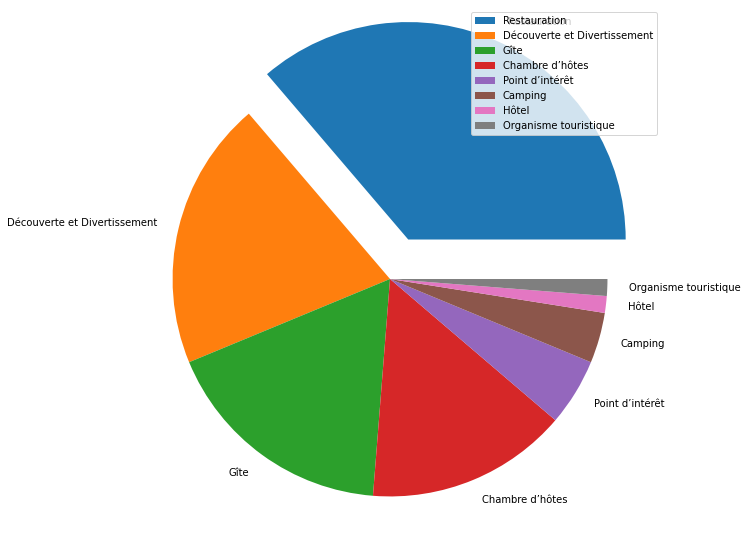

<Figure size 432x288 with 0 Axes>

In [74]:
plt.figure(figsize=(12,10))
myexplode = [0.2, 0, 0, 0, 0, 0, 0, 0]
labels = ['Restauration','Découverte et Divertissement', 'Gîte', 'Chambre d’hôtes', 'Point d’intérêt', 'Camping', 'Hôtel', 'Organisme touristique']
plt.pie(df['TYPE_OFFRE'].value_counts(), explode=myexplode, labels=labels)
plt.legend()
plt.show()
plt.savefig("img/type_offre.png")